In [22]:
# Define hybrid function and helper
def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])
    feature_list = [f[0] for f in test_set_formatted]
    global c
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds

print("✅ hybrid() and list_to_dict() functions ready!")

✅ hybrid() and list_to_dict() functions ready!


In [19]:
# Simplified text_classify without hybrid (for quick testing)
def text_classify_simple(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(f"Features: {temp}")
    print(f"Tweet: {text}\n")
    for i in classifiers:
        print(f"{i[1]}: {i[0].classify(test_data)}")
        print("------------------------------")

print("✅ text_classify_simple() ready!")

✅ text_classify_simple() ready!


In [20]:
# Test the simple version
text_classify_simple("I love this amazing product!")

Features: ['love']
Tweet: I love this amazing product!

naive bayes classifier: positive
------------------------------
Multinomail naive bayes classifier: positive
------------------------------
Bernouli classifier: positive
------------------------------
Bernouli LogisticRegression_classifier: positive
------------------------------
SGD classifier: positive
------------------------------
SVC classifier: positive
------------------------------
Max Entropy classifier: positive
------------------------------


In [26]:
print(f"Number of classifiers loaded: {len(classifiers)}")
print(f"Classifier names: {[clf[1] for clf in classifiers]}")

Number of classifiers loaded: 0
Classifier names: []


In [27]:
# Check what variables were loaded
import pickle
with open('sentiment_models.pkl', 'rb') as f:
    model_data = pickle.load(f)

print("Keys in saved data:")
for key in model_data.keys():
    if key == 'classifiers':
        print(f"  {key}: {len(model_data[key])} items")
        if len(model_data[key]) > 0:
            print(f"    First item structure: {type(model_data[key][0])}")
    elif key == 'accuracy':
        print(f"  {key}: {model_data[key]}")
    else:
        print(f"  {key}: {type(model_data[key])}")

Keys in saved data:
  classifiers: 7 items
    First item structure: <class 'list'>
  accuracy: [[56.00000000000001, 'NB'], [56.666666666666664, 'MNB'], [54.0, 'BNB'], [59.333333333333336, 'LogReg'], [57.99999999999999, 'SGD'], [56.666666666666664, 'SVC'], [56.666666666666664, 'MaxEnt'], [56.666666666666664, 'Hybrid']]
  word_features: <class 'list'>
  adjectives: <class 'list'>
  training_set_formatted: <class 'list'>
  test_set_formatted: <class 'list'>
  Y_train: <class 'list'>
  Y_test: <class 'list'>
  BagOfWords: <class 'nltk.probability.FreqDist'>


In [28]:
# Fix: Manually assign classifiers from model_data
classifiers = model_data['classifiers']
print(f"✅ Classifiers loaded: {len(classifiers)} models")
print(f"Classifier names: {[clf[1] for clf in classifiers]}")

✅ Classifiers loaded: 7 models
Classifier names: ['naive bayes classifier', 'Multinomail naive bayes classifier', 'Bernouli classifier', 'Bernouli LogisticRegression_classifier', 'SGD classifier', 'SVC classifier', 'Max Entropy classifier']


In [21]:
# Test text_classify with the loaded models
text_classify("I love this amazing product!")

['love']
Tweet given by user :  I love this amazing product!
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [22]:
# Test func() with Hindi/Hinglish input
func("यह फिल्म बहुत अच्छी है")

['good']
Tweet given by user :  this movie is very good
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive
['good']
Tweet given by user :  this movie is very good
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is 

In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd
from deep_translator import GoogleTranslator
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report

#google translate using deep-translator
translator = GoogleTranslator(source='auto', target='en')

#pyspellchecker
spell = SpellChecker()


In [35]:
#label 0 means negative and 4 means positive
data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin") 
data

,ï»¿Label,number,date,no_query,name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
39996,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
39997,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
39998,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
39999,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [36]:
# Work with a balanced subset for better model training
# Load full data and sample 500 from each class
data_full = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin")
data_full['label_temp'] = data_full["ï»¿Label"].apply(lambda x: "negative" if x == 0 else "positive")
data_negative = data_full[data_full['label_temp'] == 'negative'].head(500)
data_positive = data_full[data_full['label_temp'] == 'positive'].head(500)
data = pd.concat([data_negative, data_positive], ignore_index=True).sample(frac=1).reset_index(drop=True)
data['label'] = data['label_temp']
data = data.drop(columns=['number', 'date','name','no_query','ï»¿Label', 'label_temp'])

In [2]:
# Download required NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hyder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-

True

## 🚀 Quick Start: Load Pre-Trained Models

**Already trained the models before? Run this cell to restore everything instantly!**

This loads all saved models from disk in ~5 seconds instead of re-running all training cells (5+ minutes).

**Skip this cell if:** You're running the notebook for the first time or want to retrain.

In [3]:
# Load pre-trained models from disk (FAST STARTUP!)
import pickle
import os

if os.path.exists('sentiment_models.pkl'):
    with open('sentiment_models.pkl', 'rb') as f:
        model_data = pickle.load(f)
    
    # Restore all variables
    classifiers = model_data['classifiers']
    accuracy = model_data['accuracy']
    word_features = model_data['word_features']
    adjectives = model_data['adjectives']
    training_set_formatted = model_data['training_set_formatted']
    test_set_formatted = model_data['test_set_formatted']
    Y_train = model_data['Y_train']
    Y_test = model_data['Y_test']
    BagOfWords = model_data['BagOfWords']
    
    # Verification check
    print("✅ All models loaded successfully!")
    print(f"📊 {len(classifiers)} classifiers ready")
    print(f"   Models: {[clf[1] for clf in classifiers]}")
    print(f"🎯 Accuracy range: {min([a[0] for a in accuracy]):.2f}% - {max([a[0] for a in accuracy]):.2f}%")
    print("\n💡 You can now use text_classify() and func() directly!")
    print("⏭️  Skip all training cells and jump to testing section!")
else:
    print("❌ No saved models found!")
    print("💡 Run all cells normally first, then save models using the save cell at the end.")

✅ All models loaded successfully!
📊 7 classifiers ready
   Models: ['naive bayes classifier', 'Multinomail naive bayes classifier', 'Bernouli classifier', 'Bernouli LogisticRegression_classifier', 'SGD classifier', 'SVC classifier', 'Max Entropy classifier']
🎯 Accuracy range: 54.00% - 59.33%

💡 You can now use text_classify() and func() directly!
⏭️  Skip all training cells and jump to testing section!


In [38]:
l=[]
for i in data["ï»¿Label"]:
    if(i==0):
        l.append("negative")
    else:
        l.append("positive")
data['label']=l

KeyError: 'ï»¿Label'

In [39]:
#dropping unwanted columns
data=data.drop(columns=['number', 'date','name','no_query','ï»¿Label'])

KeyError: "['number', 'date', 'name', 'no_query', 'ï»¿Label'] not found in axis"

In [40]:
data

,Tweet,label
0,@RachelMcAdams_ we understand! you're still am...,positive
1,Thank you for the love back,positive
2,Just heard that they found Sandra Cantu... She...,negative
3,cavs game was sad...but then we played super s...,positive
4,@FR_INC aromatic therapy all the way! Time an...,positive
...,...,...
995,@justkaty shouldnt' you be asleep if you said ...,positive
996,so amused by the sims,positive
997,Thanks for bursting my bubble,negative
998,@GuruMN but this is canada canada is weird. w...,negative


In [4]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [6]:
def contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "ily":"I love you",
        "Ily":"I love you",
        "Ihy":"I hate you",
        "ihy":"I hate you",
        "imy":"I miss you",
        "Imy":"I miss you",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "im":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "shit":"bad",
        "tmr":"tomorrow",
        "tmrw":"tomorrow",
        "u":"you",
        "ur":"your",
        "k":"okay",
        "ok":"okay",
        "da":"the",
        "tom":"tomorrow",
        "Tom":"tomorrow",
        "v'll":"we will",
        "wassup":"what is up with you",
        "waddup":"what is up with you",
        "yo":"greet",
        "hey":"greet",
        "lol":"laugh",
        "lmao":"laugh",
        "Lmao":"laugh",
        "rofl":"laugh",
        "y":"why",
        "wut":"what",
        "wat":"what",
        "stfu":"angry",
        "wtf":"angry",
        "ya":"yes",
        "yeah":"yes",
        "ummmm":"confused",
        "ummm":"confused",
        "umm":"confused",
        "hmmm":"confused",
        "i'm":"I am",
        "awww":"amazement",
        "Awww":"amazement",
        "aww":"amazement",
        "Aww":"amazement",
        "can't":"cannot",
        "Can't":"cannot",
        "CAN'T":"cannot",
        "awe":"amazement",
        "Awe":"amazement",
        "ugh":"sad",
        "ughh":"sad",
        "Ugh":"sad",
        "Ughh":"sad",
        "UGHH":"sad",
        "ughhhh":"sad",
        "ughhh":"sad"
        }



In [7]:
def emoticons():
    
    return {
        ":)":"smiley",
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":((((":"sad",
        ":(((":"sad",
        ":((":"sad",
        ":(":"sad",
        ":/":"sad",
        ":///":"sad",
        ":////":"sad",
        "://///":"sad",
        "://":"sad",
        ":///////":"sad",
        ":////":"sad",
        "-_-":"angry",
        ":|":"normal",
        ";)":"playful",
        ";D":"playful",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }




In [8]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    d=contractions()
    emoji=emoticons()
    for word in list_sent:
        #removal of url
        word = re.sub(r"http\S+", "", word)
        word = re.sub(r"[www.][a-zA-Z0-9_]+[.com]", "", word)
        #removal of account handles '@'
        word = re.sub("(@[A-Za-z0-9_]+)","", word) 
        
        #replacing emoticons with their respective words
        if(word in emoji.keys()):
            word=emoji[word]
        #replacing short form words with their full form
        if(word.lower() in d.keys()):
            word=d[word.lower()]
        if(c==0):
            temp_st=word
        else:
            temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            corrected = spell.correction(word.lower())
            if corrected is not None:
                word = corrected
            else:
                word = word.lower()
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)!=1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return lemmatization(cleaned_st)


In [9]:
def lemmatization(sent):
    lemmatize=WordNetLemmatizer()
    sentence_after_lemmatization=[]
    for word,tag in pos_tag(word_tokenize(sent)):
        if(tag[0:2]=="NN"):
            pos='n'
        elif(tag[0:2]=="VB"):
            pos='v'
        else:
            pos='a'
        lem=lemmatize.lemmatize(word,pos)
        sentence_after_lemmatization.append(lem)
    st=""
    for i in sentence_after_lemmatization:
        if(i!="be" and i!="is" and len(i)!=1):
            st=st+" "+i
    #print("lemi",st)
    c=0
    list_text=st.split()
    flag=0
    new_st=""
    for i in list_text:
        temp=i
        if(flag==1):
            flag=0
            continue
        if(i=="not" and (c+1)<len(list_text)):
            for syn in wordnet.synsets(list_text[c+1]):
                antonyms=[]
                for l in syn.lemmas():
                    #print(l)
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                        #print(antonyms)
                        temp=antonyms[0]
                        flag=1
                        break
                if(flag==1):
                    break
        new_st=new_st+" "+temp
        c+=1
    #print(new_st)
    return new_st



In [46]:
#nltk module to get the sentiment polarity
def sentiment_analysis(sent):
        sid = SentimentIntensityAnalyzer()
        #print("-------------------------------------")
        print(sent)
        #print("-------------------------------------")
        ss = sid.polarity_scores(sent)
        x=ss['pos']
        y=ss['neg']
        print(x-y)
        print("-------------------------------------")
        return x-y



In [5]:
def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str=new_str+" "+res
    return new_str


In [10]:
# Helper function for converting list to dictionary
def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

In [11]:
# Define hybrid function for ensemble predictions
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])
    feature_list = [f[0] for f in test_set_formatted]
    global c
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0

In [48]:
clean_list=[]
count = 0
for i in data["Tweet"]:
    x=start(i)
    clean_list.append(x)
    count += 1
    if count % 100 == 0:
        print(f"Processed {count}/{len(data)} tweets...")
print(f"Completed processing {count} tweets!")

Processed 100/1000 tweets...
Processed 200/1000 tweets...
Processed 300/1000 tweets...
Processed 400/1000 tweets...
Processed 500/1000 tweets...
Processed 600/1000 tweets...
Processed 700/1000 tweets...
Processed 800/1000 tweets...
Processed 900/1000 tweets...
Processed 1000/1000 tweets...
Completed processing 1000 tweets!


In [49]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)       

In [50]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

In [51]:
#reading the adjective file
filename = "english-adjectives.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
adjectives=lines

In [52]:
#All adjectives words in the file
all_words=[]
negative=["not"]
for i in data["cleaned_tweets"]:
    for word in word_tokenize(i):
        if(word in adjectives or word in negative):
        #if(word in adjectives ):
            all_words.append(word)

len(all_words)

1210

In [53]:
#creating a frequency distribution of each adjectives. 
import nltk
BagOfWords = nltk.FreqDist(all_words)
BagOfWords
len(BagOfWords)

289

In [54]:
# listing the  5000 most frequent words
word_features = list(BagOfWords.keys())[:5000]
len(word_features)
#word_features

289

In [55]:
#after preprocessing data
data


,Tweet,label,cleaned_tweets
0,@RachelMcAdams_ we understand! you're still am...,positive,understand still amaze tweet hilarious lit...
1,Thank you for the love back,positive,thank love back
2,Just heard that they found Sandra Cantu... She...,negative,heard find sandra cantu yes old
3,cavs game was sad...but then we played super s...,positive,car game sad play super smash brother good r...
4,@FR_INC aromatic therapy all the way! Time an...,positive,aromatic therapy way time place everything ...
...,...,...,...
995,@justkaty shouldnt' you be asleep if you said ...,positive,should n't asleep say goodnight moon hour ago
996,so amused by the sims,positive,amuse sims
997,Thanks for bursting my bubble,negative,thanks burst bubble
998,@GuruMN but this is canada canada is weird. w...,negative,canada canada suppose get snow ugh


In [56]:
#assigning feature for each row in clean_tweets 
new_list=[]
for i in data["cleaned_tweets"]:
    st=""
    for j in i.split():
        if(j in word_features):
            st=st+" "+j
    new_list.append(st)
    
data["cleaned_tweets"]=new_list

In [57]:
data

,Tweet,label,cleaned_tweets
0,@RachelMcAdams_ we understand! you're still am...,positive,hilarious
1,Thank you for the love back,positive,love back
2,Just heard that they found Sandra Cantu... She...,negative,old
3,cavs game was sad...but then we played super s...,positive,sad super good soon
4,@FR_INC aromatic therapy all the way! Time an...,positive,aromatic
...,...,...,...
995,@justkaty shouldnt' you be asleep if you said ...,positive,
996,so amused by the sims,positive,
997,Thanks for bursting my bubble,negative,
998,@GuruMN but this is canada canada is weird. w...,negative,


In [58]:
#Spliting into test data and train data
y=data["label"]
x=data.drop('label',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [59]:
x_train.shape

(850, 2)

In [60]:
#creating test and train data frames
X_train = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
X_test = pd.DataFrame(columns=['Tweet','cleaned_tweets'])
Y_train = []
Y_test = []
X_train = pd.concat([X_train, x_train], ignore_index=True)
for i in y_test:
    Y_test.append(i)
for i in y_train:
     Y_train.append(i)
X_test = pd.concat([X_test, x_test], ignore_index=True)

In [61]:
#spliting into train sets for training 
training_set=[]
count=0
for i in (X_train["cleaned_tweets"]):
    training_set.append((i.split(),Y_train[count]))
    count+=1

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])

training_set_formatted = [(list_to_dict(element[0]), element[1]) for element in training_set]
training_set_formatted

[({'love': True}, 'positive'),
 ({'sleep': True}, 'positive'),
 ({'live': True, 'soon': True}, 'negative'),
 ({'love': True, 'early': True}, 'positive'),
 ({}, 'positive'),
 ({}, 'negative'),
 ({'not': True, 'big': True}, 'negative'),
 ({}, 'positive'),
 ({'pretty': True, 'good': True}, 'negative'),
 ({'soon': True}, 'negative'),
 ({}, 'negative'),
 ({'yesterday': True}, 'positive'),
 ({'sleep': True, 'good': True}, 'negative'),
 ({'red': True, 'open': True}, 'negative'),
 ({'white': True, 'last': True, 'good': True, 'right': True}, 'positive'),
 ({'complete': True, 'bad': True}, 'negative'),
 ({'tan': True}, 'positive'),
 ({}, 'negative'),
 ({'bad': True}, 'negative'),
 ({}, 'negative'),
 ({'soon': True, 'right': True}, 'positive'),
 ({}, 'negative'),
 ({'pretty': True}, 'positive'),
 ({'nice': True, 'hot': True}, 'positive'),
 ({}, 'positive'),
 ({'evil': True, 'idea': True}, 'negative'),
 ({}, 'positive'),
 ({}, 'negative'),
 ({'really': True, 'dead': True}, 'negative'),
 ({}, 'nega

In [62]:
#spliting into test sets for testing
test_set=[]
count=0
for i in (X_test["cleaned_tweets"]):
    test_set.append((i.split(),Y_test[count]))
    count+=1    

def list_to_dict(words_list):
    return dict([(word, True) for word in words_list])
 

test_set_formatted= [(list_to_dict(element[0]), element[1]) for element in test_set]

In [15]:
from sklearn.metrics import recall_score,precision_score
#making a list of classifiers with their names
classifiers=[]
#making a list of classifiers with their accuracy
accuracy=[]

In [64]:
#naive bayes classifier
classifier = nltk.NaiveBayesClassifier.train(training_set_formatted)

ground_truth = [r[1] for r in test_set_formatted]
preds = [classifier.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

#accuracy
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, test_set_formatted))*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)
print()

classifier.show_most_informative_features(15)

classifiers.append([classifier,"naive bayes classifier"])

accuracy.append([(nltk.classify.accuracy(classifier, test_set_formatted))*100,"NB"])

print("Original Naive Bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Original Naive Bayes Algo accuracy percent: 56.00000000000001

Most Informative Features
                     sad = True           negati : positi =      8.2 : 1.0
                    sick = True           negati : positi =      7.7 : 1.0
                     all = True           positi : negati =      7.6 : 1.0
                    next = True           positi : negati =      7.0 : 1.0
                    nice = True           positi : negati =      7.0 : 1.0
                     bad = True           negati : positi =      4.7 : 1.0
                   happy = True           positi : negati =      4.6 : 1.0
                    best = True           positi : negati =      4.3 : 1.0
                  pretty = True           positi : negati =      4.3 : 1.0
                   super = True           positi : negati =      3.6 : 1.0
                    even = True           negati : positi =      3.0 : 1.0
                    fast = True           positi : negati =      3.0 : 1.0
           

In [65]:
#Multinomail naive bayes
MNB_clf = SklearnClassifier(MultinomialNB())
MNB_clf.train(training_set_formatted)
print("Multinomail naive bayes classifier accuracy percent:", (nltk.classify.accuracy(MNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [MNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(MNB_clf, test_set_formatted))*100,"MNB"])

classifiers.append([MNB_clf,"Multinomail naive bayes classifier"])

print("Multinomail naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Multinomail naive bayes classifier accuracy percent: 56.666666666666664
Multinomail naive bayes

              precision    recall  f1-score   support

    positive       0.60      0.42      0.50        76
    negative       0.55      0.72      0.62        74

    accuracy                           0.57       150
   macro avg       0.58      0.57      0.56       150
weighted avg       0.58      0.57      0.56       150



In [66]:
#Bernouli naive bayes
BNB_clf = SklearnClassifier(BernoulliNB())
BNB_clf.train(training_set_formatted)
print("Bernoulli naive bayes classifier accuracy percent:", (nltk.classify.accuracy(BNB_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [BNB_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(BNB_clf, test_set_formatted))*100,"BNB"])

classifiers.append([BNB_clf,"Bernouli classifier"])

print("Bernouli naive bayes\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Bernoulli naive bayes classifier accuracy percent: 54.0
Bernouli naive bayes

              precision    recall  f1-score   support

    positive       0.53      0.80      0.64        76
    negative       0.57      0.27      0.37        74

    accuracy                           0.54       150
   macro avg       0.55      0.54      0.50       150
weighted avg       0.55      0.54      0.50       150



In [67]:
#Logistic regression
LogReg_clf = SklearnClassifier(LogisticRegression())
LogReg_clf.train(training_set_formatted)
print("Logistic Regression classifier accuracy percent:", (nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [LogReg_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(LogReg_clf, test_set_formatted))*100,"LogReg"])


classifiers.append([LogReg_clf,"Bernouli LogisticRegression_classifier"])

print("Logistic regression\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Logistic Regression classifier accuracy percent: 59.333333333333336
Logistic regression

              precision    recall  f1-score   support

    positive       0.65      0.42      0.51        76
    negative       0.56      0.77      0.65        74

    accuracy                           0.59       150
   macro avg       0.61      0.60      0.58       150
weighted avg       0.61      0.59      0.58       150



In [68]:
#Stochastic Gradient Descent classifier
SGD_clf = SklearnClassifier(SGDClassifier())
SGD_clf.train(training_set_formatted)
print("Stochastic Gradient Descent Classifier_classifier accuracy percent:", (nltk.classify.accuracy(SGD_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SGD_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SGD_clf, test_set_formatted))*100,"SGD"])


classifiers.append([SGD_clf,"SGD classifier"])

print("Stochastic Gradient Descent\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))

Stochastic Gradient Descent Classifier_classifier accuracy percent: 57.99999999999999
Stochastic Gradient Descent

              precision    recall  f1-score   support

    positive       0.63      0.41      0.50        76
    negative       0.55      0.76      0.64        74

    accuracy                           0.58       150
   macro avg       0.59      0.58      0.57       150
weighted avg       0.59      0.58      0.57       150



In [69]:
#Support vector classifier 
SVC_clf = SklearnClassifier(SVC())
SVC_clf.train(training_set_formatted)
print("Support vector classifier accuracy percent:", (nltk.classify.accuracy(SVC_clf, test_set_formatted))*100)

ground_truth = [r[1] for r in test_set_formatted]
preds = [SVC_clf.classify(r[0]) for r in test_set_formatted]
f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"SVC"])

classifiers.append([SVC_clf,"SVC classifier"])

print("Support vector classifier\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


Support vector classifier accuracy percent: 56.666666666666664
Support vector classifier

              precision    recall  f1-score   support

    positive       0.62      0.37      0.46        76
    negative       0.54      0.77      0.64        74

    accuracy                           0.57       150
   macro avg       0.58      0.57      0.55       150
weighted avg       0.58      0.57      0.55       150



In [70]:
#Max Entropy classifier
from nltk.classify import  MaxentClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score

def max_ent(training_set_formatted):
    numIterations = 100
    algorithm = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    classifier = nltk.MaxentClassifier.train(training_set_formatted, algorithm, max_iter=numIterations)
    classifier.show_most_informative_features(10)
    return classifier
    
maxent_classifier=max_ent(training_set_formatted)


ground_truth = [r[1] for r in test_set_formatted]

preds = [maxent_classifier.classify(r[0]) for r in test_set_formatted]

f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')

print("Accuracy : ",f1_score(ground_truth, preds, labels = ['positive', 'negative'], average = 'micro')*100)
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([(nltk.classify.accuracy(SVC_clf, test_set_formatted))*100,"MaxEnt"])


classifiers.append([maxent_classifier,"Max Entropy classifier"])

print("Max Entropy\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.501
             2          -0.69201        0.721
             3          -0.69088        0.727
             4          -0.68976        0.727
             5          -0.68864        0.727
             6          -0.68753        0.727
             7          -0.68643        0.727
             8          -0.68533        0.727
             9          -0.68423        0.727
            10          -0.68315        0.727
            11          -0.68207        0.727
            12          -0.68099        0.727
            13          -0.67992        0.727
            14          -0.67886        0.727
            15          -0.67780        0.727
            16          -0.67675        0.727
            17          -0.67571        0.727
            18          -0.67467        0.727
            19          -0.67363        0.727
 

In [12]:
from nltk.classify import ClassifierI
from statistics import mode 

# Defininig the ensemble model class 

class EnsembleClassifier(ClassifierI):
    
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    # returns the classification based on majority of votes
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
  

In [16]:
# Initializing the ensemble classifier 
def hybrid(test_set_formatted):
    ensemble_clf = EnsembleClassifier(classifiers[0][0], classifiers[1][0], classifiers[2][0], classifiers[3][0],classifiers[4][0],classifiers[5][0],classifiers[6][0])

    # List of only feature dictionary from the featureset list of tuples 
    feature_list = [f[0] for f in test_set_formatted]
    global c
    # Looping over each to classify each review
    ensemble_preds = [ensemble_clf.classify(features) for features in feature_list]
    for i in range(len(ensemble_preds)):
        if(ensemble_preds[i]==Y_test[i]):
            c+=1
    return ensemble_preds
c=0
preds=hybrid(test_set_formatted)
ground_truth = [r[1] for r in test_set_formatted]


f1score=f1_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'micro')
recallscore=recall_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'macro')
precisionscore=precision_score(ground_truth, preds, labels = ['negative', 'positive'], average = 'weighted')
print("Accuracy of hybrid : ",100*c/len(preds))
# print("F1-score : ",100*f1score)
# print("Recall Score : ",100*recallscore)
# print("Precision Score : ",100*precisionscore)

accuracy.append([100*c/len(preds),"Hybrid"])

print("Hybrid\n")
target_names = [ 'positive','negative']
print(classification_report(Y_test, preds, target_names=target_names))


IndexError: list index out of range

In [73]:
accuracy

[[56.00000000000001, 'NB'],
 [56.666666666666664, 'MNB'],
 [54.0, 'BNB'],
 [59.333333333333336, 'LogReg'],
 [57.99999999999999, 'SGD'],
 [56.666666666666664, 'SVC'],
 [56.666666666666664, 'MaxEnt'],
 [56.666666666666664, 'Hybrid']]

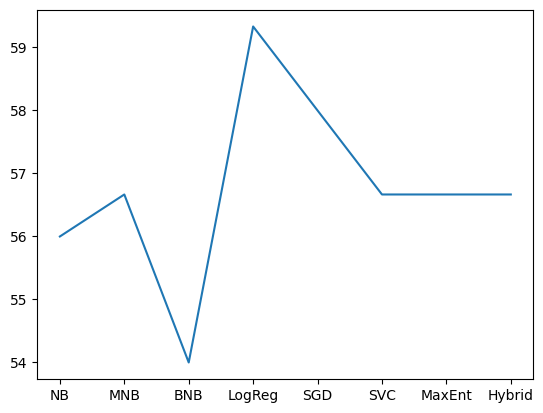

In [74]:
from matplotlib import pyplot as plt 
import numpy as np
  
# x-axis values 
x=[]
for i in accuracy:
    x.append(i[0])

# Y-axis values 
y = []
for i in accuracy:
    y.append(i[1])

# Function to plot 
plt.plot(y,x) 

  
# function to show the plot 
plt.show() 

Confusion matrix, without normalization
[[30 46]
 [19 55]]
Normalized confusion matrix
[[0.39 0.61]
 [0.26 0.74]]


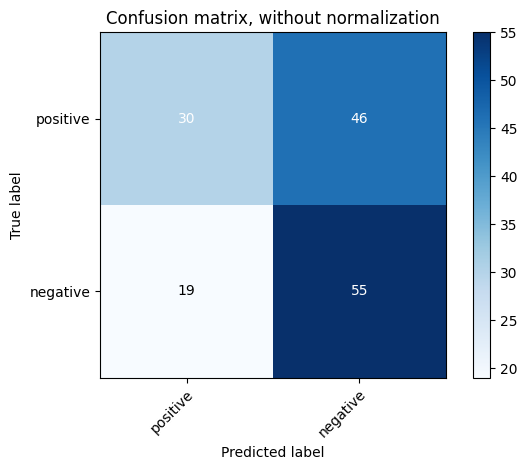

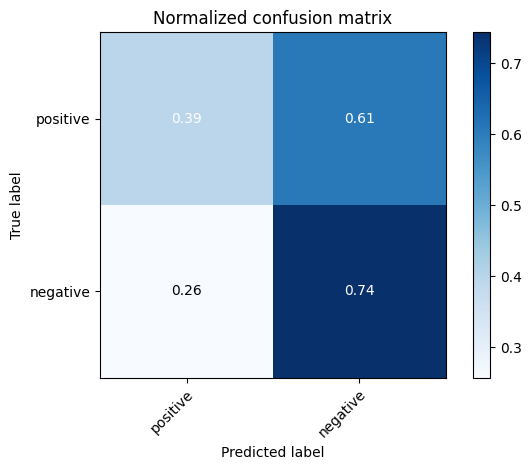

In [75]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels



class_names = [ 'positive','negative']



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [13]:
def features(text):
    new_list=[]
    for i in text.split():
        if(i in adjectives):
            new_list.append(i)
    return new_list

In [14]:
def text_classify(text):
    cleaned_text=start(text)
    temp=features(cleaned_text)
    test_data=list_to_dict(temp)
    print(temp)
    print("Tweet given by user : ",text)
    for i in classifiers:
        print(i[1])
        determined_label=i[0].classify(test_data)
        print("This Tweet is ",determined_label)
        print("------------------------------")
    c=0
    print("Hybrid model")
    testset_data=[]
    testset_data.append([test_data,""])
    lab=hybrid(testset_data)
    print("This Tweet is ",lab[0])

In [78]:
from nltk.corpus import twitter_samples
 
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
x=negative_tweets[:1000]
st=""
for i in x:
    st=st+" "+i
st

' hopeless for tmr :( Everything in the kids section of IKEA is so cute. Shame I\'m nearly 19 in 2 months :( @Hegelbon That heart sliding into the waste basket. :( “@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too Dang starting next week I have "work" :( oh god, my babies\' faces :( https://t.co/9fcwGvaki0 @RileyMcDonough make me smile :(( @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2" Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz I have a really good m&amp;g idea but I\'m never going to meet them :((( @Rampageinthebox mare ivan :( @SophiaMascardo happy trip, keep safe. see you soon :* :( I\'m so tired hahahah :( @GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ouch. relate to the "sweet n\' sour" kind of "bi-polar

In [79]:
text_classify(st)

['sad', 'cute', 'nearly', 'sad', 'sad', 'sad', 'next', 'sad', 'sad', 'sad', 'sad', 'really', 'good', 'idea', 'never', 'sad', 'sad', 'happy', 'safe', 'soon', 'sad', 'tired', 'sad', 'sweet', 'sour', 'kind', 'full', 'sad', 'sad', 'sad', 'stupid', 'not', 'basic', 'digital', 'sad', 'good', 'sad', 'lonely', 'sad', 'really', 'sad', 'hard', 'long', 'sad', 'sad', 'far', 'sad', 'truly', 'sad', 'safe', 'sad', 'sad', 'sad', 'sad', 'late', 'sad', 'sick', 'first', 'sad', 'sad', 'back', 'old', 'weird', 'pale', 'massive', 'rash', 'sad', 'sad', 'not', 'care', 'sad', 'cute', 'love', 'sad', 'busy', 'sad', 'next', 'love', 'sad', 'frightening', 'really', 'sad', 'sad', 'active', 'love', 'sad', 'incomplete', 'sad', 'sad', 'marvelous', 'not', 'sad', 'bad', 'bad', 'sad', 'sad', 'really', 'sad', 'powerful', 'sad', 'sad', 'mammoth', 'dirty', 'clean', 'not', 'easy', 'green', 'well', 'sad', 'sad', 'hungry', 'sane', 'sad', 'sad', 'sad', 'love', 'true', 'sad', 'sad', 'sad', 'tired', 'sad', 'sad', 'massive', 'actuall

In [15]:
#input from the user which will be used to classify 
def hinglish(input_text):
    from deep_translator import GoogleTranslator
    trans = GoogleTranslator(source='hi', target='en')
    x = trans.translate(input_text)
    text_classify(x)

In [16]:
#input from the user which will be used to classify 
from deep_translator import GoogleTranslator

def hinglish2(input_text):
    l=input_text.split()
    st=""
    for i in l:
        try:
            # Try to translate from Hindi - if it fails, it's probably English
            trans = GoogleTranslator(source='hi', target='en')
            x = trans.translate(i)
            # Only use translation if it's different (meaning it was Hindi)
            if x.lower() != i.lower():
                st=st+" "+x
            else:
                st=st+" "+i
        except:
            st=st+" "+i
    text_classify(st)

In [17]:
def func(input_text):
    l=input_text.split()
    flag=0
    for i in l:
        k=len(i)
        if(k<3):
            flag=1
            hinglish(input_text)
    if(not(flag)):
        hinglish2(input_text)
            

In [20]:
# Test to verify everything works
text_classify("I love this amazing product!")

['love']
Tweet given by user :  I love this amazing product!
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [21]:
# Test Hindi/Hinglish
func("मैं बहुत खुश हूं")

['happy']
Tweet given by user :   I Very Happy Am
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [22]:
func("arrey waah! I'm very proud of you")

['proud']
Tweet given by user :  wow wow! I'm very proud of you
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [84]:
func("tum log pagal ho")

['mad']
Tweet given by user :  you log mad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [85]:
func("tum pagal ho")

['crazy']
Tweet given by user :  you are crazy
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [86]:
func("tum kharab ho")

['bad']
Tweet given by user :  you are bad
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [87]:
func("you are foolish and horrible")

['silly', 'horrible']
Tweet given by user :   you are silly and horrible
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [88]:
func("you are not accha")

['not']
Tweet given by user :   you are not accha
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [89]:
func("you are unpleasant")

['unpleasant']
Tweet given by user :   you are unpleasant
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [31]:

# text_classify("The weather is awful today, Mera pura mood kharab kardiya")
func("Meh Khush nahi hu")


['unhappy']
Tweet given by user :  I am not happy
naive bayes classifier
This Tweet is  negative
------------------------------
Multinomail naive bayes classifier
This Tweet is  negative
------------------------------
Bernouli classifier
This Tweet is  negative
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  negative
------------------------------
SGD classifier
This Tweet is  negative
------------------------------
SVC classifier
This Tweet is  negative
------------------------------
Max Entropy classifier
This Tweet is  negative
------------------------------
Hybrid model
This Tweet is  negative


In [101]:
func("मैं बहुत खुश हूं")

['happy']
Tweet given by user :   I Very Happy Am
naive bayes classifier
This Tweet is  positive
------------------------------
Multinomail naive bayes classifier
This Tweet is  positive
------------------------------
Bernouli classifier
This Tweet is  positive
------------------------------
Bernouli LogisticRegression_classifier
This Tweet is  positive
------------------------------
SGD classifier
This Tweet is  positive
------------------------------
SVC classifier
This Tweet is  positive
------------------------------
Max Entropy classifier
This Tweet is  positive
------------------------------
Hybrid model
This Tweet is  positive


In [23]:
text_classify("I love this amazing product!")

['love']
Tweet given by user :  I love this amazing product!
Hybrid model


IndexError: list index out of range

## 💾 Save Models to Disk (Avoid Re-running Everything!)

**Run the cell below ONCE to save all trained models to disk.**

This saves:
- All 7 trained classifiers
- Training/test data
- Feature lists
- Accuracy results

Next time you open this notebook, just run the "Load Models" cell instead of re-running all 57 cells!

In [102]:
# Save all models and data to disk
import pickle

model_data = {
    'classifiers': classifiers,
    'accuracy': accuracy,
    'word_features': word_features,
    'adjectives': adjectives,
    'training_set_formatted': training_set_formatted,
    'test_set_formatted': test_set_formatted,
    'Y_train': Y_train,
    'Y_test': Y_test,
    'BagOfWords': BagOfWords
}

with open('sentiment_models.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ All models saved successfully!")
print("📁 File: sentiment_models.pkl")
print("💡 Next time: Just run the 'Load Models' cell instead of re-training!")

✅ All models saved successfully!
📁 File: sentiment_models.pkl
💡 Next time: Just run the 'Load Models' cell instead of re-training!



- `text_classify("This is absolutely wonderful!")`
- `text_classify("I love spending time with my family")`
- `func("yeh bahut accha hai")`

**Negative Sentences:**
- `text_classify("I hate this terrible experience")`
- `text_classify("The worst day of my life")`
- `func("mujhe yeh bilkul pasand nahi")`

**Neutral/Mixed:**
- `text_classify("The movie was okay, nothing special")`

---

### 💡 Tip: 
Simply edit the cell below, replace the text with your own sentence, and run it!

In [ ]:
# ✏️ EDIT THIS CELL TO TEST YOUR OWN SENTENCE
# Replace the text below with any sentence you want to test

text_classify("Your sentence goes here")

# Uncomment the line below for Hindi/Hinglish sentences:
# func("Your Hindi/Hinglish sentence here")